<a href="https://colab.research.google.com/github/Dario-Zela/Neural-Networks-Test/blob/main/Language_Model_(Wavenet).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import string
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.nn as nn

In [ ]:
device = torch.device('cpu')
if torch.cuda.is_available():
    device = torch.device('cuda')
print(device)

cuda


In [ ]:
words = open("names.txt", "r").read().splitlines()
chars = string.ascii_lowercase
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi["."] = 0
itos = {i:s for s,i in stoi.items()}
vocab_size = len(itos)

In [ ]:
block_size = 8

def build_dataset(words):
  X, Y = [], []

  for w in words:
    context = [0] * block_size
    for c in w+".":
      ix = stoi[c]
      X.append(context)
      Y.append(ix)
      context = context[1:] + [ix]
  print(torch.tensor(X).shape, torch.tensor(Y).shape)
  return torch.tensor(X), torch.tensor(Y)

import random
random.shuffle(words)

n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182617, 8]) torch.Size([182617])
torch.Size([22740, 8]) torch.Size([22740])
torch.Size([22789, 8]) torch.Size([22789])


In [ ]:
n_embed = 10
n_hidden = 200
n_merged = 2
batch_size = 4

model = nn.Sequential(
    nn.Embedding(vocab_size, n_embed),
    nn.Unflatten(1,(-1,n_merged)), nn.Flatten(2), nn.Linear(n_embed * n_merged, n_hidden, bias=False), nn.Flatten(0,1), nn.BatchNorm1d(n_hidden), nn.Unflatten(0,(-1, block_size // n_merged)), nn.Tanh(),
    nn.Unflatten(1,(-1,n_merged)), nn.Flatten(2), nn.Linear(n_hidden * n_merged, n_hidden, bias=False), nn.Flatten(0,1), nn.BatchNorm1d(n_hidden), nn.Unflatten(0,(-1, block_size // (n_merged * 2))), nn.Tanh(),
    nn.Unflatten(1,(-1,n_merged)), nn.Flatten(2), nn.Linear(n_hidden * n_merged, n_hidden, bias=False), nn.Flatten(0,1), nn.BatchNorm1d(n_hidden), nn.Tanh(),
    nn.Linear(n_hidden, vocab_size)
)

layers = [i for i in model.modules()]

with torch.no_grad():
  [i for i in model.modules()][-1].weight  *= 0.01  

parameters = [i for i in model.parameters()]

In [ ]:
max_step = 200000
lossi = []

for i in range(max_step):

  ix = torch.randint(0,Xtr.shape[0], (batch_size,))
  x = Xtr[ix]

  x = model(x)
  loss = F.cross_entropy(x, Ytr[ix])

  model.zero_grad()

  loss.backward()

  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += - lr * p.grad

  if i % 10000 == 0:
    print(f"{i:7d}/{max_step:7d}: {loss.item():.4f}")
  
  lossi.append(loss.log10().item())

      0/ 200000: 3.3118
  10000/ 200000: 2.9306
  20000/ 200000: 3.0087
  30000/ 200000: 2.0653
  40000/ 200000: 2.3833
  50000/ 200000: 4.0307
  60000/ 200000: 2.9606
  70000/ 200000: 3.0681
  80000/ 200000: 3.3308
  90000/ 200000: 3.0559
 100000/ 200000: 2.9824
 110000/ 200000: 2.6824
 120000/ 200000: 1.7208
 130000/ 200000: 2.2945
 140000/ 200000: 2.9037
 150000/ 200000: 2.8155
 160000/ 200000: 2.4985
 170000/ 200000: 1.7421
 180000/ 200000: 2.3480
 190000/ 200000: 2.0401


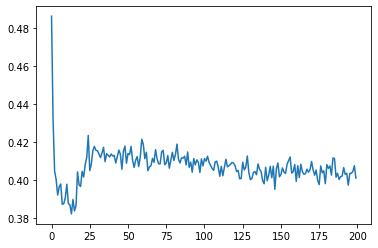

In [ ]:
plt.plot(torch.tensor(lossi).view(-1,1000).mean(1))

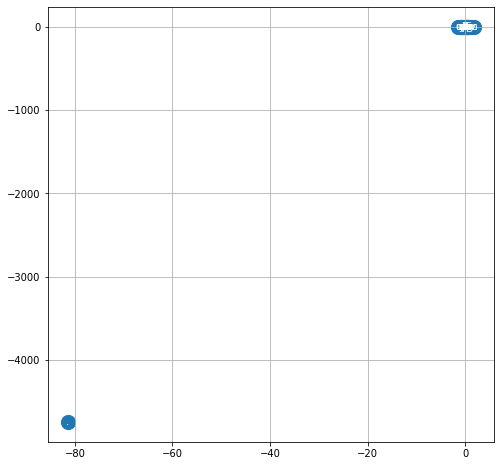

In [ ]:
plt.figure(figsize=(8,8))
C = [i for i in layers[0].parameters()][0]

plt.scatter(C[:,0].detach(), C[:,1].detach(), s=200)

for i in range(C.shape[0]):
  plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color="white")
plt.grid("minor")

In [ ]:
model.eval()

for _ in range(20):
  out = []
  context = [0] * block_size

  for _ in range(200):

      x = torch.tensor([context])
      x = model(x)

      probs = F.softmax(x, dim= 1)

      ix = torch.multinomial(probs, num_samples = 1).item()
      context = context[1:] + [ix]

      out.append(itos[ix])

      if(ix == 0): 
        break
  
  if out[:-1] in words:
    print("duplicate")

  print("".join(out[:-1]))

plyaoay
zaagr
elryi
daloic
cniyle
mete
dnltyln
jels
jirwh
iirenaan
keqznu
julml
krrr
kaeynktkaa
klasay
brjvy
camuen
eellry
oiaayr
irilnl
